In [24]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

In [25]:
#panggil data
df=pd.read_csv('D:\Self Development\Pacmann\AB Testing\marketing_AB.csv')

In [26]:
#memunculkan 10 baris pertama dari data
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [27]:
#Menampilkan informasi seputar tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [28]:
#Mengecek missing value
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [29]:
#Mengecek Duplikasi data
df.duplicated().sum()

0

In [30]:
#Mencari nilai standar deviasi dari data
df.std()

C:\Users\LISNAY~1\AppData\Local\Temp/ipykernel_12324/3005906001.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Unnamed: 0       169770.279667
user id          202225.983128
converted             0.156850
total ads            43.715181
most ads hour         4.834634
dtype: float64

In [32]:
#Menghitung sample size

delta = 0.01
std_converted = 0.157
sample_size = (16*std_converted**2)/(delta)**2
print(f'Jumlah sampel yang dibutuhkan per grup: {round(sample_size)}')
print(f'Jumlah sampel yang dibutuhkan untuk seluruh grup: {round(2*sample_size)}')

Jumlah sampel yang dibutuhkan per grup: 3944
Jumlah sampel yang dibutuhkan untuk seluruh grup: 7888


In [33]:
# Hitung Jumlah Sampel per Grup
df_control = df[df['test group']=='psa']
df_treatment = df[df['test group']=='ad']

n_control = df_control.shape[0]
n_treatment = df_treatment.shape[0]

n_control, n_treatment

(23524, 564577)

In [34]:
# Mendapatkan banyak sampel yang converted berdasarkan grup
n_control_convert = df_control[df_control['converted']== True].shape[0]
n_treatment_convert = df_treatment[df_treatment['converted']== True].shape[0]

n_control_convert, n_treatment_convert

(420, 14423)

In [35]:
# Mendapatkan nilai conversion rate berdasarkan grup
re_control = n_control_convert/n_control
re_treatment = n_treatment_convert/n_treatment

re_control, re_treatment

(0.01785410644448223, 0.025546559636683747)

C:\Users\LISNAY~1\AppData\Local\Temp/ipykernel_12324/1516025211.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


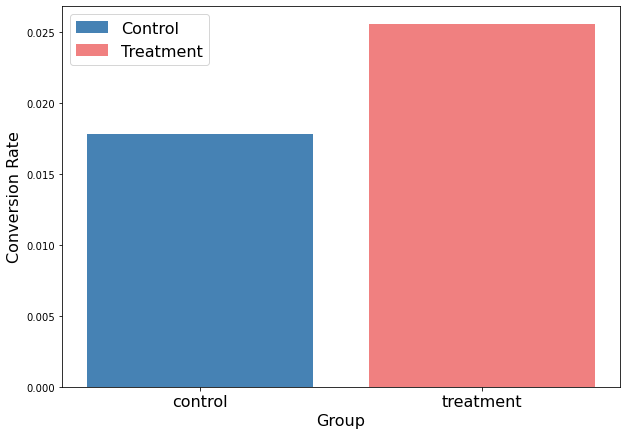

In [36]:
#visualisasi conversion rate
# visualisasi perbandingan conversion rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", re_control, color="steelblue", label="Control")
ax.bar("treatment", re_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [37]:
# Hitung Efek Relatif
relative_effect = (re_treatment - re_control)/re_control * 100
print(f"relatife effect = {relative_effect:.3} %")

relatife effect = 43.1 %


In [38]:
# Buat count convert & total observation
count_convert = [n_treatment_convert,n_control_convert]
count_observation = [n_treatment,n_control]
alternative_option = 'larger'

In [39]:
# Panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 7.3701
P-value : 0.0000


In [41]:
# Dari p-value
alpha = 0.05        # confidence level yang kita set

# Buat decision berdasarkan p_value dan alpha
if p_value < alpha:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


In [42]:
# Z critical adalah z-value saat alpha
import scipy.stats as stats
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [43]:
# Dari z-statistics
# Buat decision berdasarkan z_critical dan alpha
if z_stat > z_critical:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


In [44]:
df.groupby('test group')['converted'].value_counts()

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

In [45]:
#Mencari nilai sample obs

group=['control','treatment']
size=[23524, 564577]
df_sample=pd.DataFrame({'group':group, 'size obs':size})
df_sample

,group,size obs
0,control,23524
1,treatment,564577


In [46]:
#Mencari nilai sample expected

df_sample['size exp']=sum(df_sample['size obs'])/2
df_sample

,group,size obs,size exp
0,control,23524,294050.5
1,treatment,564577,294050.5


In [47]:
#Menghitung nilai chi square

alpha=0.05
dof=(2-1)*(2-1)
chi_sqr=[((df_sample['size obs']-df_sample['size exp'])**2)/df_sample['size exp']][0].sum()
chi_sqr

497768.8336000109

In [48]:
#Pengecekan SRM berdasarkan chi square

chi_sqr_critical=stats.chi2.ppf(1-alpha, df=dof)
print("chi_sqr_critical",chi_sqr_critical)
print("chi_sqr",chi_sqr)
if chi_sqr > chi_sqr_critical:
    print("reject H0: terjadi SRM")
else:
    print("fail to reject H0: no SRM")

chi_sqr_critical 3.841458820694124
chi_sqr 497768.8336000109
reject H0: terjadi SRM


In [49]:
#Pengecekan SRM berdasarkan P Value

p_val=stats.chi2.sf(chi_sqr, df=dof)
print("P Value", p_val)
print("significance level", alpha)
if p_val < alpha:
    print("Reject H0: Terjadi SRM")
else:
    print("fail to reject H0")

P Value 0.0
significance level 0.05
Reject H0: Terjadi SRM
